# Bay Area Bike Sharing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

trip = pd.read_csv('trip.csv')
trip.head(1)

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139


The commute table is created by filtering the trips table to include only trips with a duration less than 1800 seconds (30 minutes). These are considered "commute" trips.

In [2]:
commute = trip[trip['Duration'] < 1800]
commute.head(1)

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139


This code generates a histogram of the trip durations in the commute table. The x-axis represents the duration in seconds, and the y-axis represents the frequency of trips.

<Axes: xlabel='Duration', ylabel='Count'>

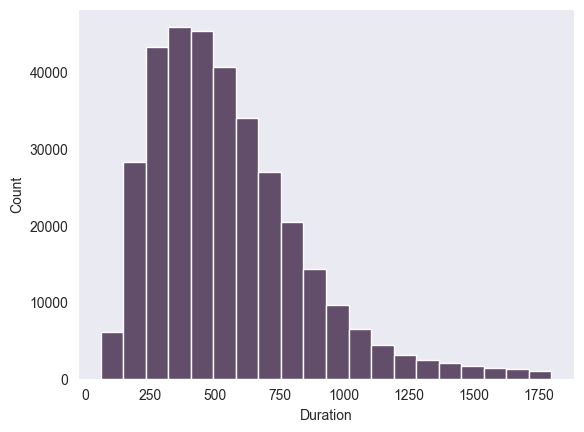

In [3]:
sns.set_palette('rocket')
sns.set_style('dark')
sns.histplot(data = commute,
    x = 'Duration',
    bins = 20)

The starts table is created by grouping the commute table by the "Start Station" column and then sorting the result in descending order based on the count of each start station. This provides information on the most highly used start stations.

In [4]:
starts = commute['Start Station'].value_counts().sort_values(ascending=False).reset_index()
starts.head(5)

,Start Station,count
0,San Francisco Caltrain (Townsend at 4th),25858
1,San Francisco Caltrain 2 (330 Townsend),21523
2,Harry Bridges Plaza (Ferry Building),15543
3,Temporary Transbay Terminal (Howard at Beale),14298
4,2nd at Townsend,13674


The largest number of trips started at the Caltrain Station on Townsend and 4th in San Francisco. People take the train into the city, and then use a shared bike to get to their next destination.

We now wanna group by Start station and End station.

In [5]:
startsandends = commute.groupby(['Start Station', 'End Station']).size().reset_index(name='Count')
startsandends.head(5)

,Start Station,End Station,Count
0,2nd at Folsom,2nd at Folsom,54
1,2nd at Folsom,2nd at South Park,295
2,2nd at Folsom,2nd at Townsend,437
3,2nd at Folsom,5th at Howard,113
4,2nd at Folsom,Beale at Market,127


`commute.groupby(['Start Station', 'End Station'])` groups the commute DataFrame by the combination of 'Start Station' and 'End Station'. It forms groups based on unique pairs of start and end stations.

After grouping, the `size()` function is applied to count the number of occurrences in each group. It returns a Series with the counts for each unique pair of start and end stations.

The `reset_index` method is used to convert the result into a new DataFrame. The `name='Count'` argument assigns the name 'Count' to the column containing the size/count values. This step is optional, but it's often used to provide a meaningful name to the count column.

This next code creates a pivot table showing the count of trips between different start and end stations. The table is organized to display all possible combinations, even if there were no trips between some pairs.

In [6]:
pivot = trip.pivot_table(index='Start Station', columns='End Station', aggfunc='size', fill_value=0).reset_index()
pivot.head()

End Station,Start Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,...,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
0,2nd at Folsom,87,299,446,116,0,0,127,69,0,...,49,327,0,0,129,414,351,0,142,86
1,2nd at South Park,194,194,159,184,0,0,79,92,0,...,42,210,0,0,232,439,312,0,144,182
2,2nd at Townsend,558,74,280,153,0,0,187,282,0,...,57,410,0,0,1662,489,425,0,77,176
3,5th at Howard,108,183,92,197,0,0,64,122,0,...,107,101,0,0,374,566,317,0,49,95
4,Adobe on Almaden,0,0,0,0,29,9,0,0,0,...,0,0,11,0,0,0,0,0,0,0


Drawing maps

In [7]:
station = pd.read_csv('station.csv')
station.head(1)

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013


We can draw a map of where the stations are located, using Marker.map_table. The function operates on a table, whose columns are (in order) latitude, longitude, and an optional identifier for each point.

In [10]:
import folium

# Assuming 'station' DataFrame has 'lat', 'long', and 'name' columns
station = pd.read_csv('station.csv')

# Coordinates for San Francisco
map_center = [37, -122.4194]

# Create a map centered around San Francisco
mymap = folium.Map(location=map_center, zoom_start=7)

# Add markers to the map
for _, station_row in station.iterrows():
    folium.Marker([station_row['lat'], station_row['long']], popup=station_row['name']).add_to(mymap)

# Display the map
mymap

Now we want the markers to have five different colors for the five different cities.

In [11]:
cities = station.groupby('landmark').size().reset_index(name='count')

# Assign colors to each city
colors = {
    'Mountain View': 'blue',
    'Palo Alto': 'red',
    'Redwood City': 'green',
    'San Francisco': 'orange',
    'San Jose': 'purple'
}

# Add markers to the map with different colors for each city
for _, station_row in station.iterrows():
    city_color = colors.get(station_row['landmark'], 'black')  # Default to black if city not found
    folium.Marker(
        [station_row['lat'], station_row['long']],
        popup=station_row['name'],
        icon=folium.Icon(color=city_color)
    ).add_to(mymap)

# Display the map
mymap

Now we want a map with circles = the bigger the circle = the higher density of bike rentals.

In [12]:
station_starts = station.merge(starts, left_on='name', right_on='Start Station', how='inner')

# Extract data for drawing the map
starts_map_data = station_starts[['lat', 'long', 'name', 'count']].assign(
    colors='blue',
    areas=station_starts['count'] * 0.3
)

# Display the first 3 rows of the data
starts_map_data.head(3)

,lat,long,name,count,colors,areas
0,37.329732,-121.901782,San Jose Diridon Caltrain Station,4899,blue,1469.7
1,37.330698,-121.888979,San Jose Civic Center,574,blue,172.2
2,37.333988,-121.894902,Santa Clara at Almaden,1888,blue,566.4


In [13]:
# Create a map centered around San Francisco
mymap_starts = folium.Map(location=map_center, zoom_start=8)

# Add circles to the map for starting stations
for _, row in starts_map_data.iterrows():
    folium.Circle(
        location=[row['lat'], row['long']],
        popup=row['name'],
        radius=row['areas'],
        color=row['colors'],
        fill=True,
        fill_color=row['colors']
    ).add_to(mymap_starts)

# Display the map
mymap_starts

Basic example

In [14]:
# Create a simple DataFrame with latitude and longitude columns
data = pd.DataFrame({
    'Location': ['Location 1', 'Location 2', 'Location 3'],
    'Latitude': [37.7749, 37.7899, 37.7750],
    'Longitude': [-122.4194, -122.3974, -122.4183]
})

# Calculate the mean latitude and mean longitude for centering the map (optional - but recommended)
mean_latitude = data['Latitude'].mean()
mean_longitude = data['Longitude'].mean()

# Create a map centered around the mean location
map_center = [mean_latitude, mean_longitude]
simple_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each location with popups
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Location']
    ).add_to(simple_map)

# Display the map
simple_map